<a href="https://colab.research.google.com/github/Palemravichandra/customer-segmentation/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")



Read the csv file using pandas and store it to dataframe

In [ ]:
df=pd.read_csv('train.csv')


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


To check the shape(Rows,Columns) of data

In [ ]:
df.shape

(45211, 11)

Here we have 10 independent varible and 1 target variable i.e.column=Y

In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

The data is highly imbalenced because it has only 5289 records are belongs to positive class and 39922 records belongs to negtive class and it is binary classification problem

# Duplicate Detection
If an integer or string or any items in a list are repeated more than one time, they are duplicates.

In [ ]:
df[df.duplicated()]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


here we found the duplicated records so we can drop the duplicate records

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(45205, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In data set we have two data types

1)object:object format means variables are categorical.Here categorical varibles are job,marital,educational_qual,call_type,mon,prev_outcome,y

2)int64: it represents integer variables.Here integer variables are day,duration,num_calls

3) dataset doesn't have missing values



# Univariate analysis
Univariate analysis explores each variable in a data set, separately. 

It looks at the range of values, as well as the central tendency of the values. 

It describes the pattern of response to the variable. 

it describes the distribution of feature columns how the feature is distributed


## For categorical varibles

### For ' y ' column


Percentage of yes and no
no     88.299967
yes    11.700033
Name: y, dtype: float64


<Axes: >

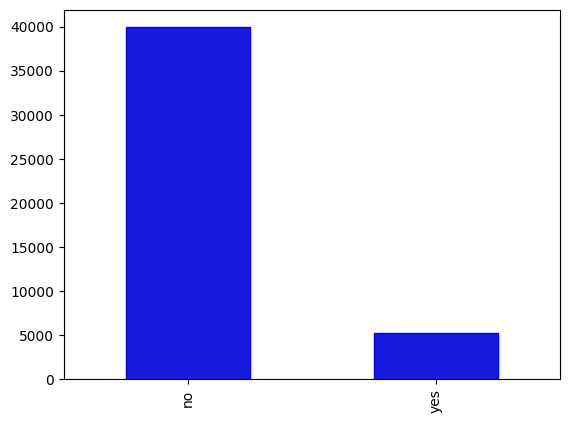

In [ ]:
print('Percentage of yes and no')
print(df['y'].value_counts()/len(df)*100)
df['y'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

Here 88.29% belongs to under the category of "no" and 11.7% belongs to under the category of "yes".so it is highly imbalenced data

### For ' job ' column

<Axes: >

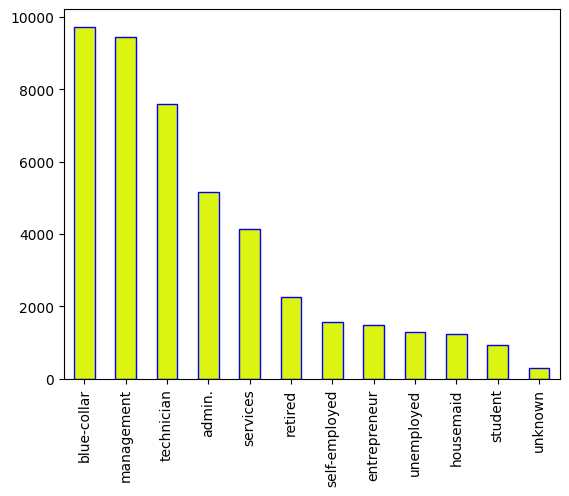

In [ ]:
df['job'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

graph shows that most of subscribers belongs to under the category of blue-collar job and least number subscribers belongs to unknown category.

here unknown value is less than considered as missing value so we can replace with most repeted(mode) value i.e.bluecoller 

In [ ]:
mode=df['job'].mode()[0]
df['job']=df['job'].replace('unknown',mode)

<Axes: >

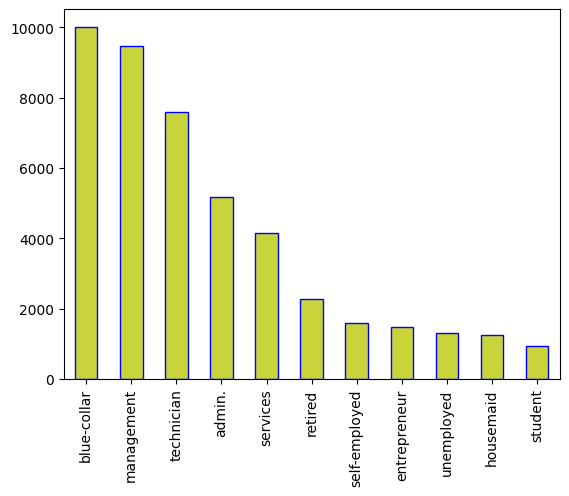

In [ ]:
df['job'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

### For ' education_qual ' column

<Axes: >

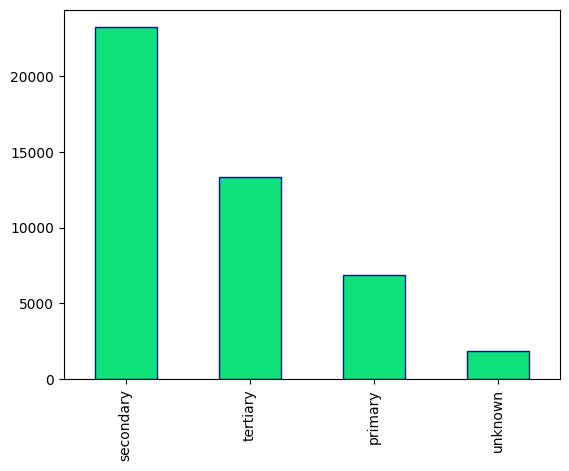

In [ ]:
df['education_qual'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

the most of the subscribers have secondary education qualification and least subscribers under the unknown

here unknown category also considered as missing value so it can be replaced by most repeated value(mode) i.e.secondary

In [ ]:
mode=df['education_qual'].mode()[0]
df['education_qual']=df['education_qual'].replace('unknown',mode)

<Axes: >

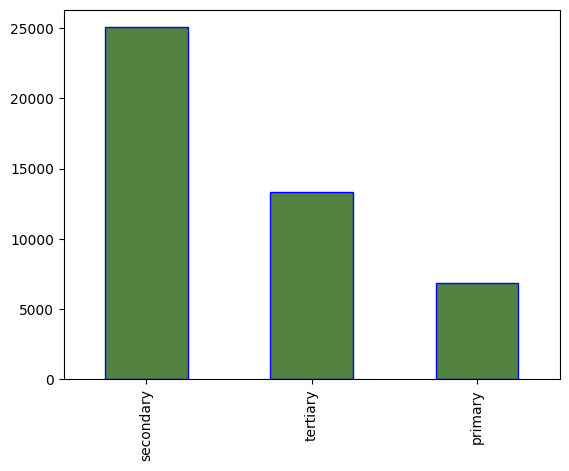

In [ ]:
df['education_qual'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

### For ' marital ' column 

<Axes: >

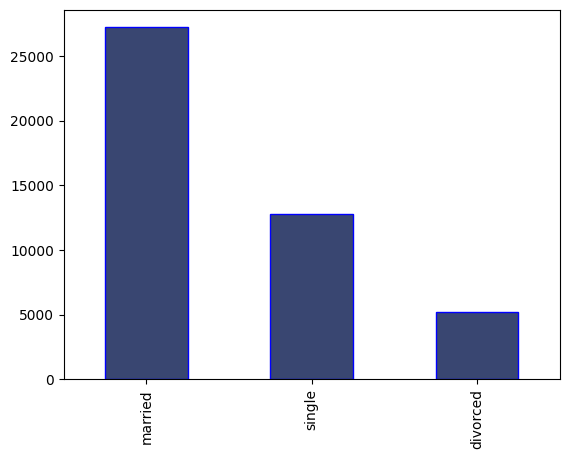

In [ ]:
df['marital'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

most of the subscribers under the category of married 

### For ' mon ' column

<Axes: >

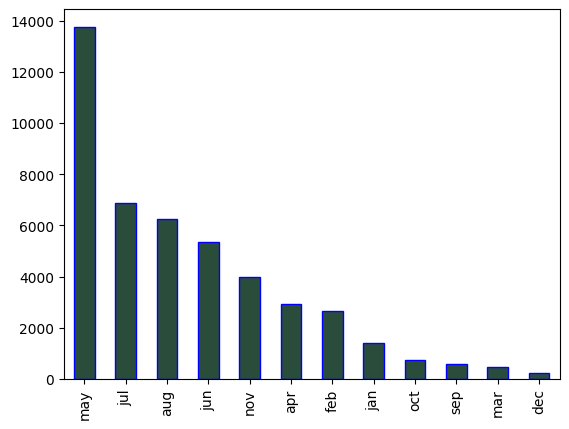

In [ ]:
df['mon'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

Most of the subscriptions was happend in may and least subscriptions was happened in december

### For ' prev_outcome ' column

<Axes: >

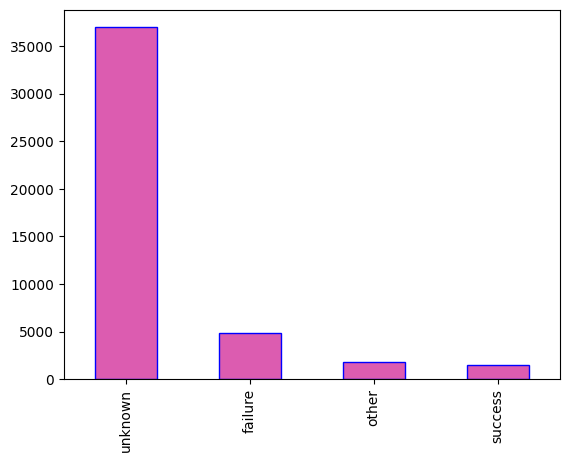

In [ ]:
df['prev_outcome'].value_counts().plot.bar(color=np.random.rand(3,),ec='blue')

here unknown is considered as first calls,for first calls there is no previous outcome

# For continues varibles

### For ' age ' column

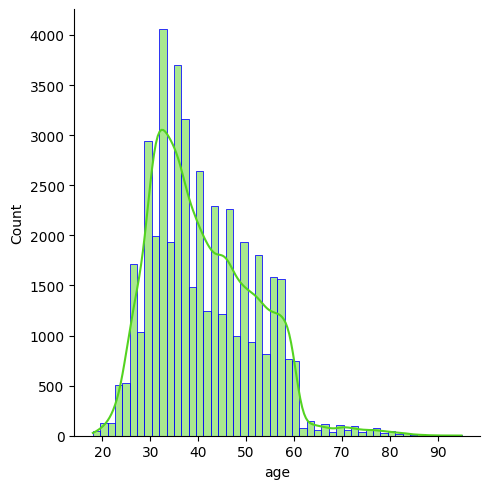

In [ ]:
sns.displot(df['age'],kde=True,bins=50,color=np.random.rand(3,),ec='blue')


most of subscibers fall under the age between 25 to 60

### For ' day ' column

<Axes: xlabel='day', ylabel='Count'>

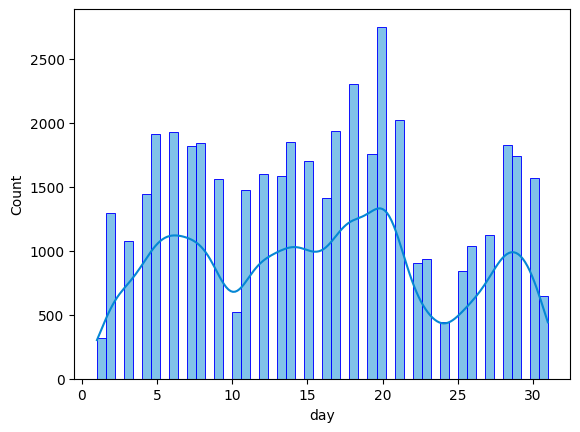

In [ ]:
sns.histplot(df['day'],kde=True,bins=50,color=np.random.rand(3,),ec='blue')

Majority of calls happened between 5 to 23 days

### For ' dur ' column

<Axes: xlabel='dur', ylabel='Count'>

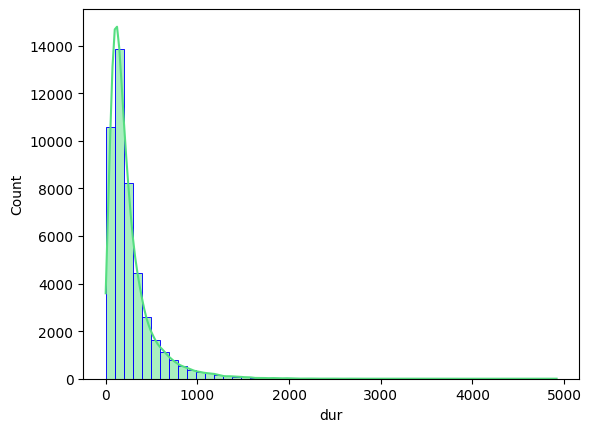

In [ ]:
sns.histplot(df['dur'],kde=True,bins=50,color=np.random.rand(3,),ec='blue')

most of duration of calls is only leass than 600 seconds i.e.approximately 9 minutes

### For ' num_calls ' column

<Axes: xlabel='num_calls', ylabel='Count'>

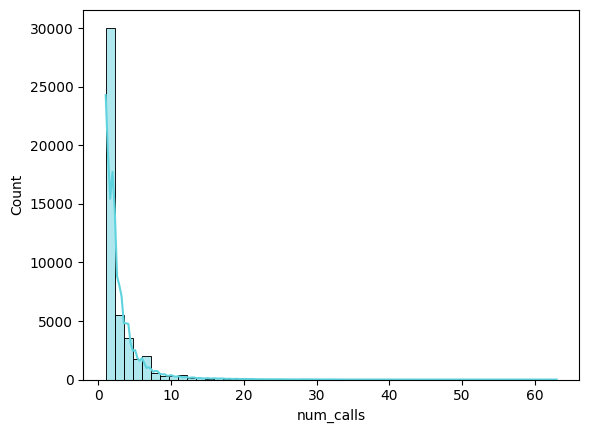

In [ ]:
sns.histplot(df['num_calls'],kde=True,bins=50,color=np.random.rand(3,))

most of times they contacted is between 2 to 5 times for majority peoples

### To display the histogram for all integer columns

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'num_calls'}>]], dtype=object)

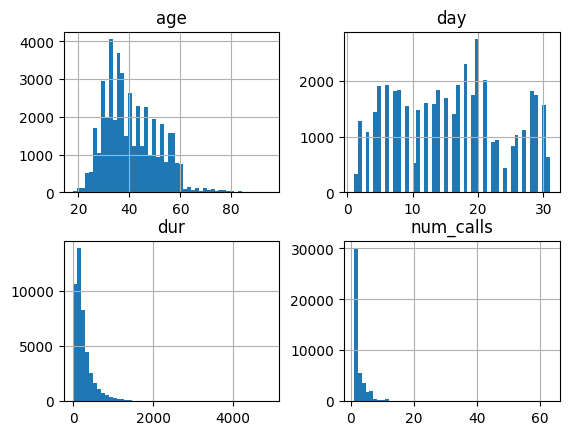

In [ ]:
df.hist(bins=50)

# Outlier detection
An outlier is a single data point that goes far outside the average value of a group of statistics

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


From the above code 'dur' and 'num_calls' columns
has outliers because 

1) In 'dur' column maximum duration of call is 4918seconds i.e.1.36 hours.Mostly it is not possible

2)In 'num_calls' maximum calls per perticular person contacted 63  times but its not possible

so we need to make outlier correction

### To see the graphical representation of outliers

### For ' age ' column

<Axes: xlabel='age'>

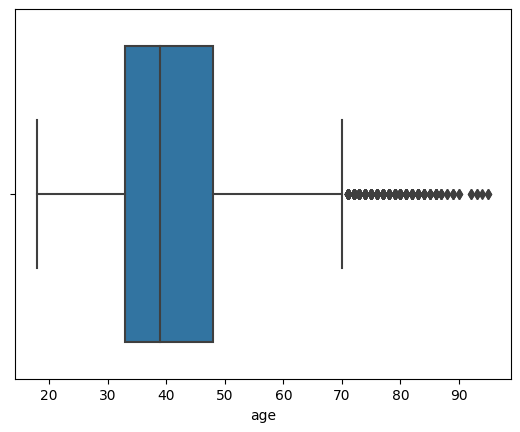

In [ ]:
sns.boxplot(x=df['age'])

age column has an outliers

### For ' day ' column

<Axes: xlabel='day'>

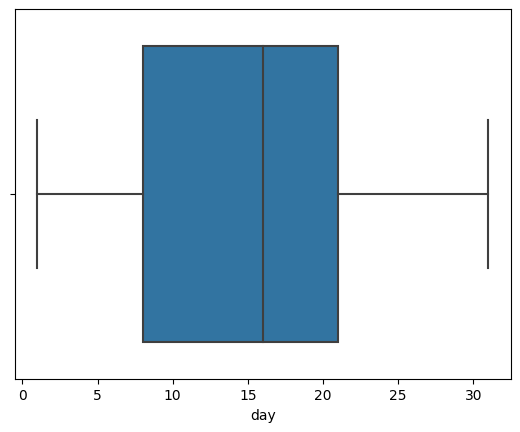

In [ ]:
sns.boxplot(x=df['day'])

day column doesnt have any  outliers and also it is discrete varible

### For ' dur ' column

<Axes: xlabel='dur'>

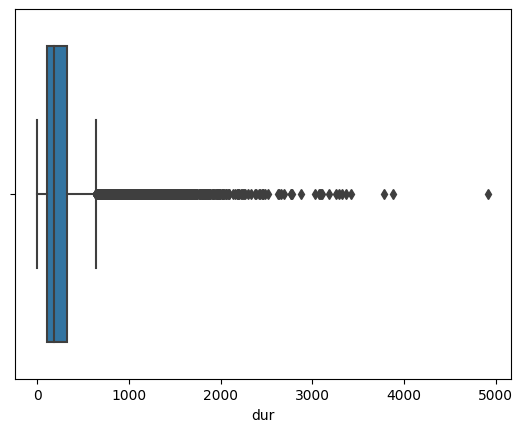

In [ ]:
sns.boxplot(x=df['dur'])

dur column has outliers

### For num_calls column

<Axes: xlabel='num_calls'>

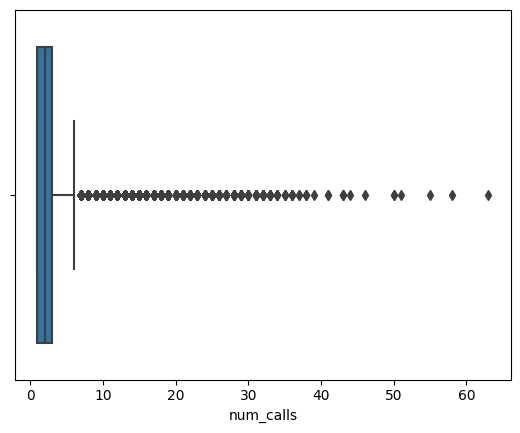

In [ ]:
sns.boxplot(x=df['num_calls'])

#### Interpreting Inter Qurtile Range(IQR)

The interquartile range (IQR) is the range of values that resides in the middle of the scores

The IQR represents how far apart the lowest and the highest measurements were that week. 


In [ ]:
columns=['age','day','dur','num_calls']
lower=[]
upper=[]
for i in columns:
  IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
  lower_bound=df[i].quantile(0.25)-(1.5*IQR)
  upper_bound=df[i].quantile(0.75)+(1.5*IQR)
  print(i,':',lower_bound,',',upper_bound)
  lower.append(lower_bound)
  upper.append(upper_bound)

age : 10.5 , 70.5
day : -11.5 , 40.5
dur : -221.0 , 643.0
num_calls : -2.0 , 6.0


Replacing the outliers with IQR value

In [ ]:
j=0
for i in columns:
  df.loc[df[i]>upper[j],i]=int(upper[j])
  j=j+1

### plots after the outlier treatment

<Axes: xlabel='age'>

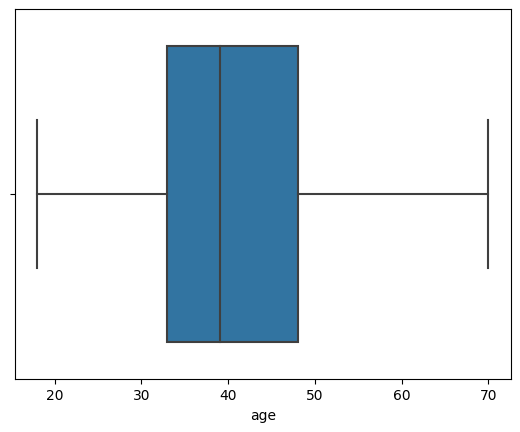

In [ ]:
sns.boxplot(x=df['age'])

<Axes: xlabel='dur'>

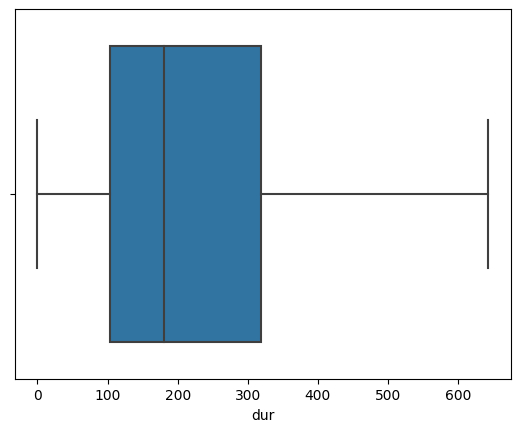

In [ ]:
sns.boxplot(x=df['dur'])

<Axes: xlabel='num_calls'>

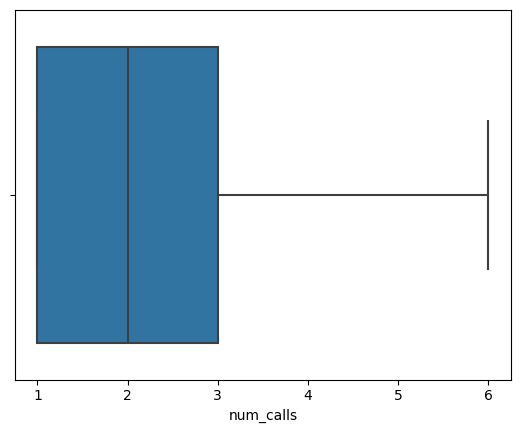

In [ ]:
sns.boxplot(x=df['num_calls'])

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.863666,15.80688,234.95620,2.392235
std,10.380009,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.000000,31.00000,643.00000,6.000000


# Bivariate analysis
Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent

In [ ]:
# replacing yes,no with 0,1
df.replace({'yes':1,'no':0},inplace=True)

<Axes: xlabel='job'>

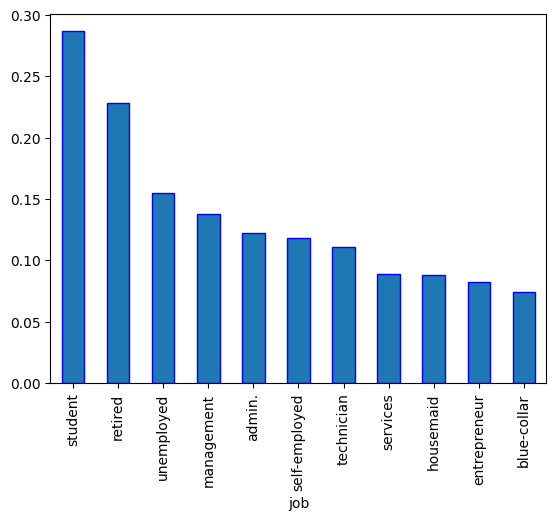

In [ ]:
df.groupby('job')['y'].mean().sort_values(ascending=False).plot(kind='bar',ec='blue')

From contacted persons,student category have higher chances to subscribe insurence and least chances for blue-coller category
and the category of data is linear order so we go for label encoding

<Axes: xlabel='marital'>

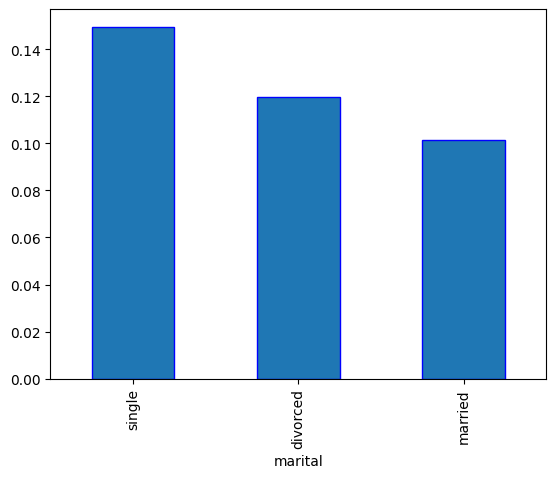

In [ ]:
df.groupby('marital')['y'].mean().sort_values(ascending=False).plot(kind='bar',ec='blue')

out of contacted people under single category have higher chances to subscribe the insurance and order of the data is linear so we can go for label encoding

<Axes: xlabel='education_qual'>

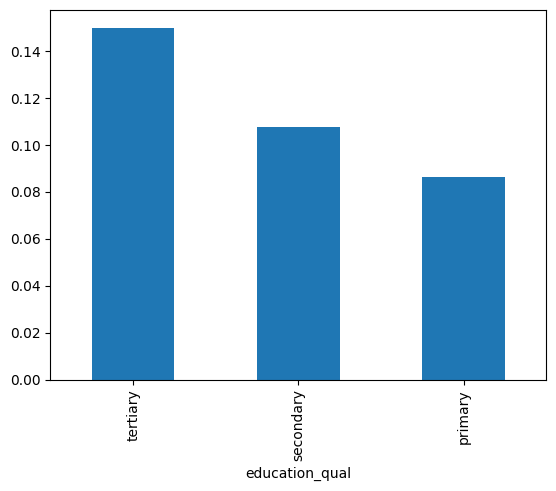

In [ ]:
df.groupby('education_qual')['y'].mean().sort_values(ascending=False).plot(kind='bar')

Out of contacted people the people under the category tertiary education qualification have subscribed the insurance and the data is linear order so we go for label encoding

<Axes: xlabel='call_type'>

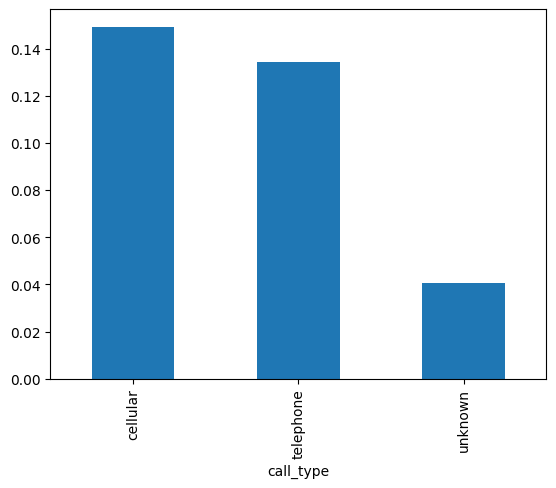

In [ ]:
df.groupby('call_type')['y'].mean().sort_values(ascending=False).plot(kind='bar')

people who contacted through cellular mode had mostly subscribed to insurance and the data is linear so we can for label encoding


<Axes: xlabel='prev_outcome'>

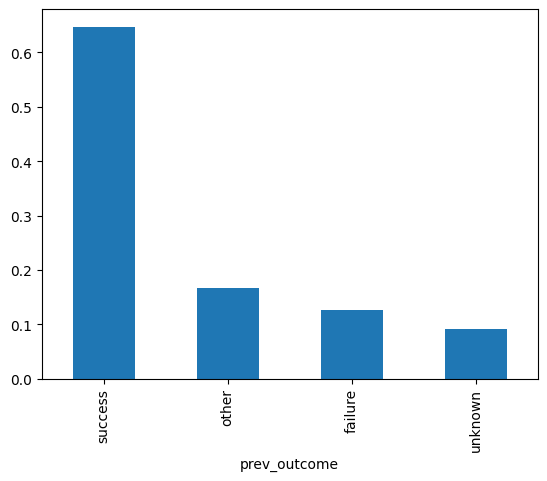

In [ ]:
df.groupby('prev_outcome')['y'].mean().sort_values(ascending=False).plot(kind='bar')

out of contacted people the people who shows the interest as previous outcome have mostly subscribed the insurance and data is linear order so we can go for label encoding

<Axes: xlabel='mon'>

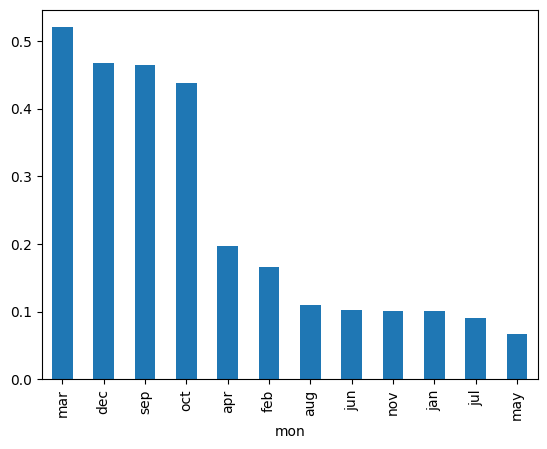

In [ ]:
df.groupby('mon')['y'].mean().sort_values(ascending=False).plot(kind='bar')

the people who cantacted in march had mostly subscribed the insurance and the data is not in linear format so we need to go for onehot encoding

# Encoding

Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model.


### Label encoding
Here the data in job,marital,education_qual,call_type,prev_outcome has approximately linear in nature so we go for label encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education_qual']= label_encoder.fit_transform(df['education_qual'])
df['call_type']= label_encoder.fit_transform(df['call_type'])
df['prev_outcome']= label_encoder.fit_transform(df['prev_outcome'])

### Onehot encoding

the month column has data in non linear structure so we can go for onehot encoding

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pd.get_dummies(df['mon'], columns = ['mon'])
#print(one_hot_encoded_data)
df=pd.concat([df,one_hot_encoded_data],axis=1)
df.drop(['mon'],axis=1,inplace=True)



In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,dur,num_calls,prev_outcome,y,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,4,1,2,2,5,261,1,3,0,...,0,0,0,0,0,0,1,0,0,0
1,44,9,2,1,2,5,151,1,3,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,1,1,2,5,76,1,3,0,...,0,0,0,0,0,0,1,0,0,0
3,47,1,1,1,2,5,92,1,3,0,...,0,0,0,0,0,0,1,0,0,0
4,33,1,2,1,2,5,198,1,3,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection

In [ ]:
data=df.drop(['y'],axis=1)
target=df['y']
data.shape

(45205, 21)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ord=SelectKBest(score_func=chi2,k=21)
ordered_fetures=ord.fit(data,target)
ordered_fetures

SelectKBest(k=21, score_func=<function chi2 at 0x7fb6cfc91dc0>)

In [ ]:
score=pd.DataFrame(ordered_fetures.scores_,columns=['score'])
columns=pd.DataFrame(data.columns)
feature_rank=pd.concat([columns,score],axis=1)
feature_rank.columns=['features','scores']
feature_rank

,features,scores
0,age,40.527831
1,job,184.494385
2,marital,29.784331
3,education_qual,79.285923
4,call_type,1253.602590
5,day,159.425080
6,dur,917256.855678
7,num_calls,341.938457
8,prev_outcome,104.623906
9,apr,180.697924


In [ ]:
feature_rank.nlargest(10,'scores')

,features,scores
6,dur,917256.855678
4,call_type,1253.602590
16,mar,749.547853
19,oct,734.552438
20,sep,677.134533
7,num_calls,341.938457
17,may,330.448049
11,dec,254.167549
1,job,184.494385
9,apr,180.697924


### Feature importance

this technique gives the score for each feature of the data ,the higher score more relevant it is

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(data,target)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.14563687 0.08020636 0.03514059 0.03486454 0.02928955 0.14921629
 0.27534516 0.06368552 0.07381101 0.00820018 0.0078194  0.0052057
 0.0077927  0.00505341 0.00716015 0.01262114 0.01586998 0.00898588
 0.00658852 0.01445787 0.01304918]


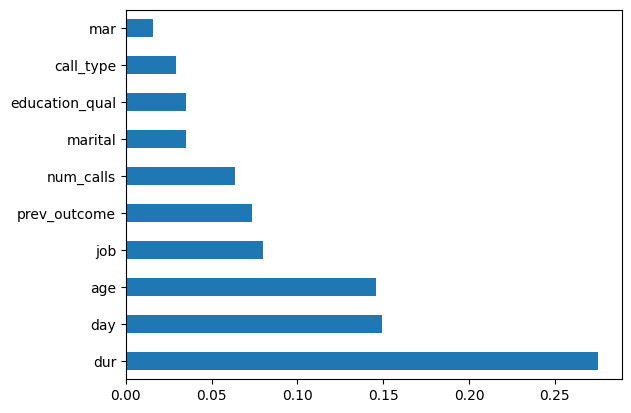

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=data.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### correlation


<Axes: >

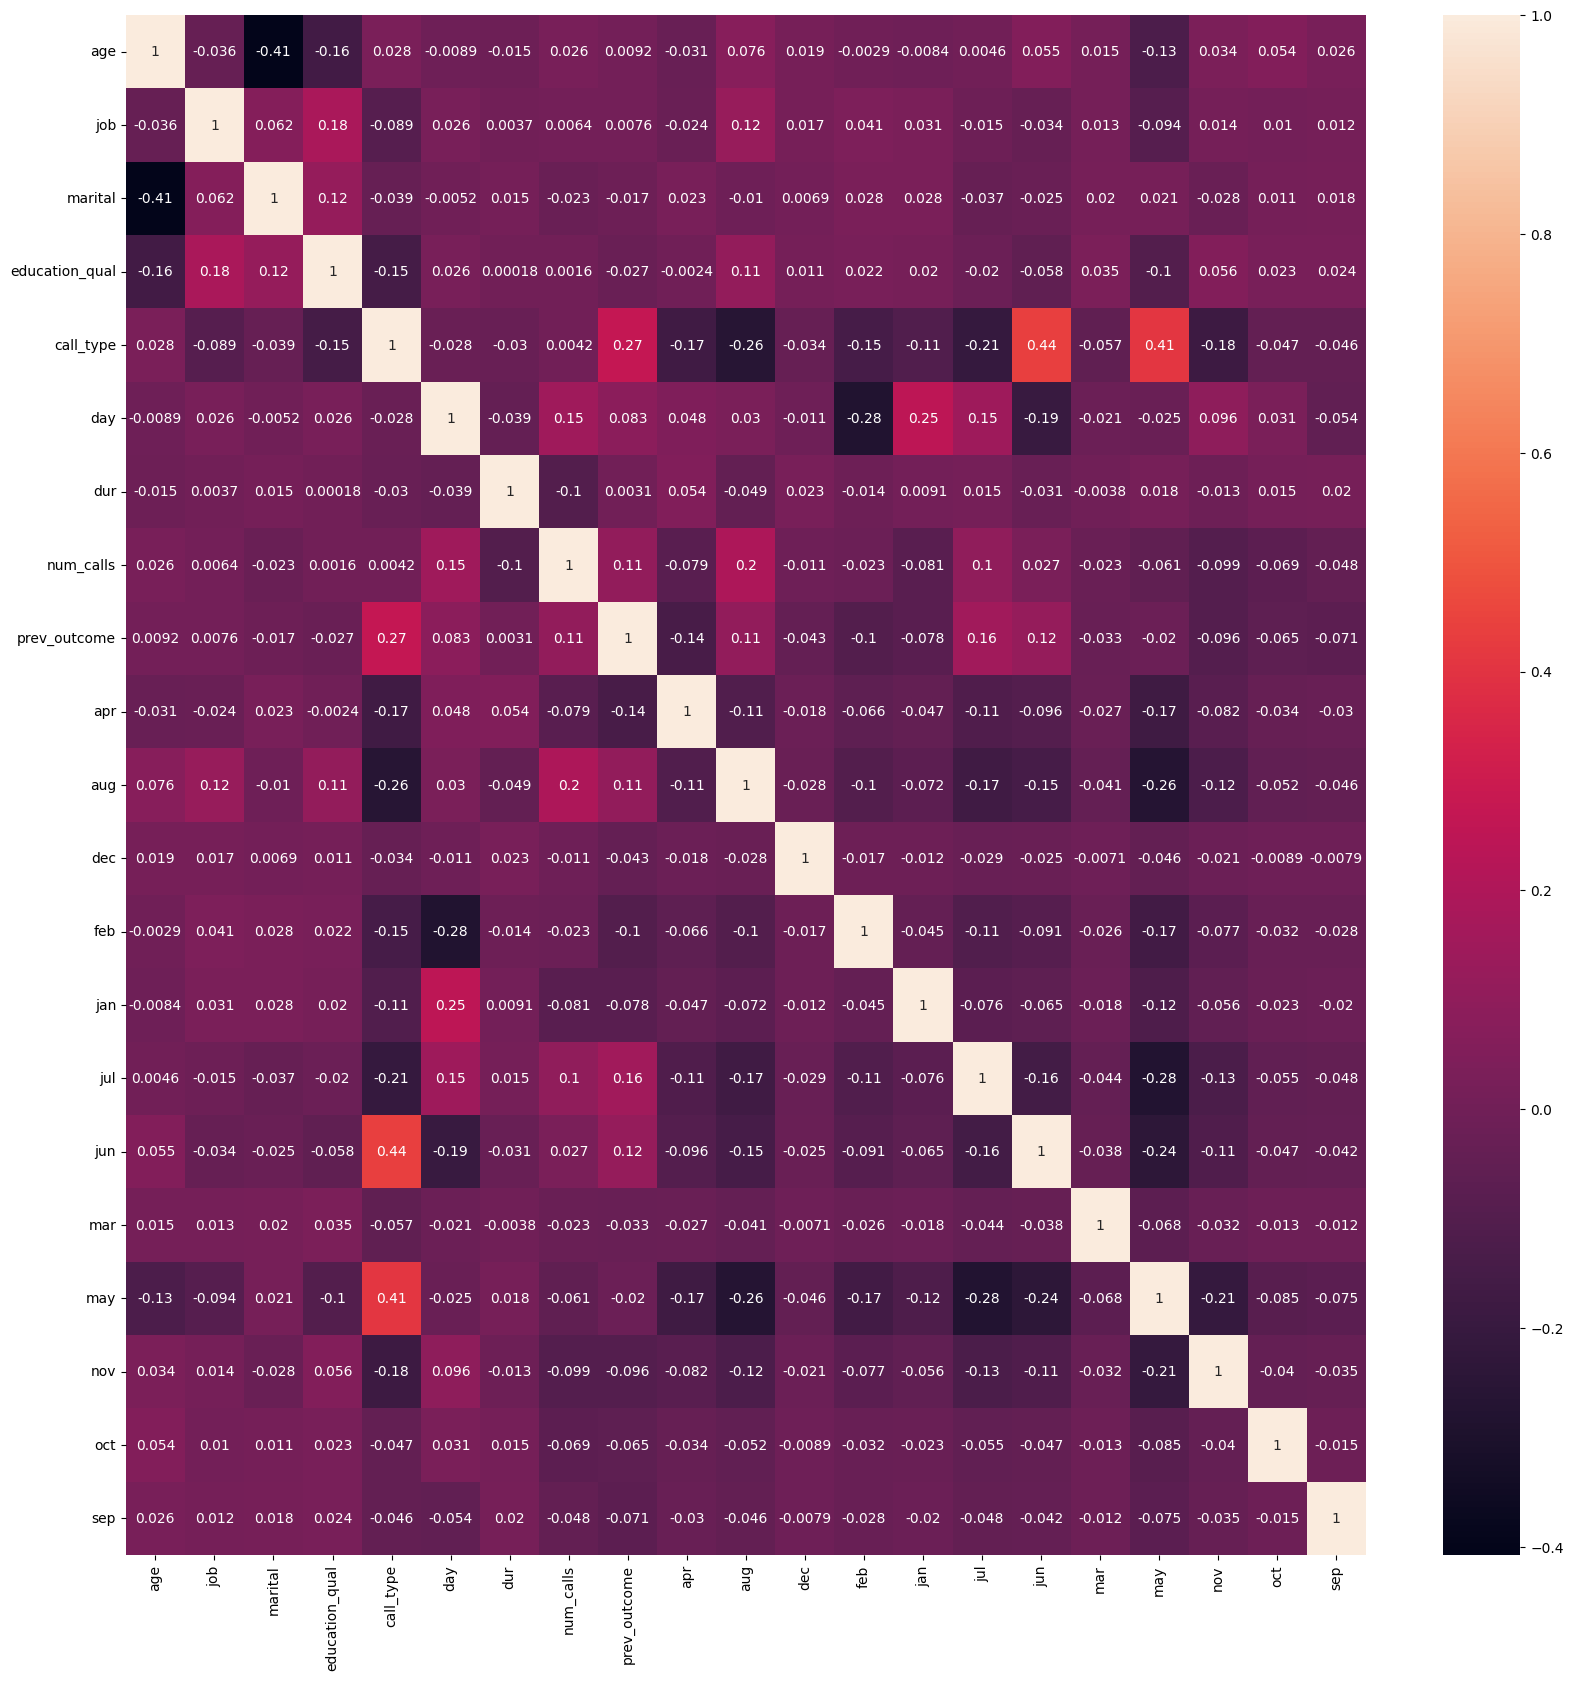

In [ ]:
corr=data.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(),annot=True)

In [ ]:
thresh_value=0.7

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(data,thresh_value)

set()

the features are not strongly correlated with each other  so we are not dropping any features

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=100)


In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((31643, 21), (31643,), (13562, 21), (13562,))

# Balencing the data

From the above discussion the data is imbalenced,so we need to make the data to be balenced by using either oversampling or under sampling technique

here iam using oversampling technique called SMOTTENN

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn=SMOTEENN(sampling_strategy=0.75,random_state=101)
x,y=smote_enn.fit_resample(x_train,y_train)  

# scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_scale=std.fit_transform(x_train)
x_test_scale=std.transform(x_test)

In [ ]:
x_train.iloc[0]

age                38
job                 1
marital             1
education_qual      1
call_type           2
day                23
dur               553
num_calls           2
prev_outcome        3
apr                 0
aug                 0
dec                 0
feb                 0
jan                 0
jul                 0
jun                 0
mar                 0
may                 1
nov                 0
oct                 0
sep                 0
Name: 5531, dtype: int64

In [ ]:
x_train_scale[0],x_test_scale[0]  

(array([-0.27297822, -1.01477688, -0.27609744, -0.21777226,  1.50849992,
         0.86282912,  1.80961802, -0.24709196,  0.44312874, -0.26133972,
        -0.40055521, -0.06855041, -0.24976067, -0.17980734, -0.42473597,
        -0.36555368, -0.10155245,  1.50932047, -0.31071697, -0.12913262,
        -0.11329292]),
 array([-0.85142504, -1.01477688,  1.36642019, -0.21777226, -0.71585121,
         1.70381547,  0.99778447, -0.24709196, -1.58521246, -0.26133972,
        -0.40055521, -0.06855041, -0.24976067,  5.56150819, -0.42473597,
        -0.36555368, -0.10155245, -0.66254982, -0.31071697, -0.12913262,
        -0.11329292]))

# Model Building

## LogisticRegression

In [ ]:
from sklearn.model_selection import KFold
param_grid={'penalty':['l1','l2'],
            'C':10.0**np.arange(-2,3)}
cv=KFold(n_splits=5,random_state=None,shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model_lg=LogisticRegression(solver='saga',max_iter=50,random_state=101)
grid_model_lg=GridSearchCV(model_lg,param_grid,cv=cv,n_jobs=-1,scoring='f1_macro')
grid_model_lg.fit(x_train_scale,y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=50, random_state=101,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [ ]:
grid_model_lg.best_params_

{'C': 100.0, 'penalty': 'l1'}

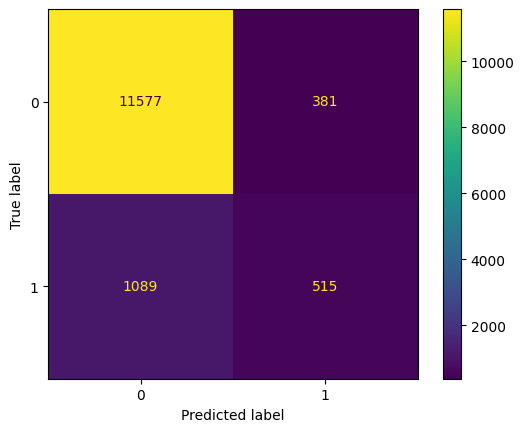

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score
pred_lg= grid_model_lg.predict(x_test_scale)
img=confusion_matrix(y_test,pred_lg)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=grid_model_lg.classes_)
img_plot.plot()
plt.show()

In [ ]:
print('accuracy of logistic regression is :',round(accuracy_score(y_test, pred_lg)*100,2),'%')
k=roc_auc_score(y_test,grid_model_lg.predict_proba(x_test_scale)[:,1])
print('aurroc-auc score of logistic regression is :',round(k,2)*100,'%')
print(classification_report(y_test, pred_lg))

accuracy of logistic regression is : 89.16 %
aurroc-auc score of logistic regression is : 88.0 %
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11958
           1       0.57      0.32      0.41      1604

    accuracy                           0.89     13562
   macro avg       0.74      0.64      0.68     13562
weighted avg       0.87      0.89      0.88     13562



 By using logistic regression model with parameters c=100.0,penalty='l1' we got accuracy 
 score of 89.16% and ROC of 88.0%

### RandomForest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(max_depth=17, random_state=0 ,n_estimators=500,max_features='sqrt')

In [ ]:
model_rf.fit(x_train_scale,y_train)
y_pred_rf=model_rf.predict(x_test_scale)


In [ ]:
print(classification_report(y_test,y_pred_rf))
print('accuracy of RandomForestclassifier  is :',round(accuracy_score(y_test, y_pred_rf)*100,2),'%')
print('aurroc-auc score of RandomForestClassifier is :',round(roc_auc_score(y_test,model_rf.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11958
           1       0.62      0.40      0.49      1604

    accuracy                           0.90     13562
   macro avg       0.77      0.68      0.72     13562
weighted avg       0.89      0.90      0.89     13562

accuracy of RandomForestclassifier  is : 89.99 %
aurroc-auc score of RandomForestClassifier is : 93.0 %


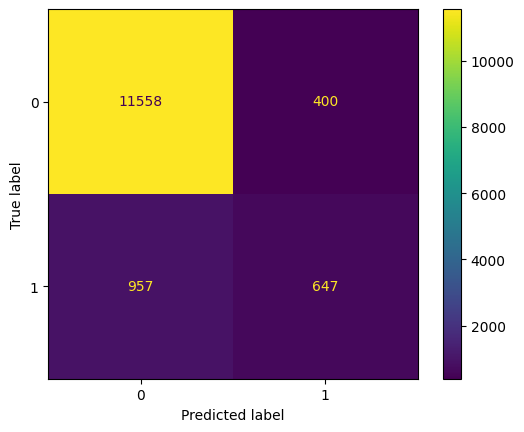

In [ ]:
img=confusion_matrix(y_test,y_pred_rf)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=model_rf.classes_)
img_plot.plot()
plt.show()

 The model RandomForestClassifier given the accuracy value 89.72% and aurroc score of 93.0%

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=25, metric='euclidean',n_jobs=30,algorithm='kd_tree')
knn_clf.fit(x_train_scale, y_train)
y_pred_clf= knn_clf.predict(x_test_scale)
print(classification_report(y_test,y_pred_clf))
print('accuracy of KNeighborsClassifier  is :',round(accuracy_score(y_test, y_pred_clf)*100,2),'%')
print('aurroc-auc score of KNeighborsClassifier is :',round(roc_auc_score(y_test,knn_clf.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11958
           1       0.61      0.24      0.34      1604

    accuracy                           0.89     13562
   macro avg       0.76      0.61      0.64     13562
weighted avg       0.87      0.89      0.87     13562

accuracy of KNeighborsClassifier  is : 89.18 %
aurroc-auc score of KNeighborsClassifier is : 89.0 %


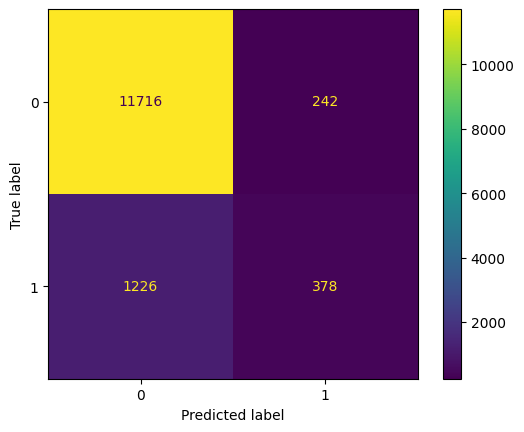

In [ ]:
img=confusion_matrix(y_test,y_pred_clf)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=knn_clf.classes_)
img_plot.plot()
plt.show()

## SVM classifier

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='linear',gamma='auto',C=3.0,degree=5,probability=True,shrinking=True)

In [ ]:
model_svm.fit(x_train_scale,y_train)
y_pred_svm=model_svm.predict(x_test_scale)
print(classification_report(y_test,y_pred_svm))
print('accuracy of SVMClassifier  is :',round(accuracy_score(y_test, y_pred_svm)*100,2),'%')
print('aurroc-auc score of SVM Classifier is :',round(roc_auc_score(y_test,model_svm.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11958
           1       0.53      0.05      0.09      1604

    accuracy                           0.88     13562
   macro avg       0.71      0.52      0.52     13562
weighted avg       0.84      0.88      0.84     13562

accuracy of SVMClassifier  is : 88.25 %
aurroc-auc score of SVM Classifier is : 77.0 %


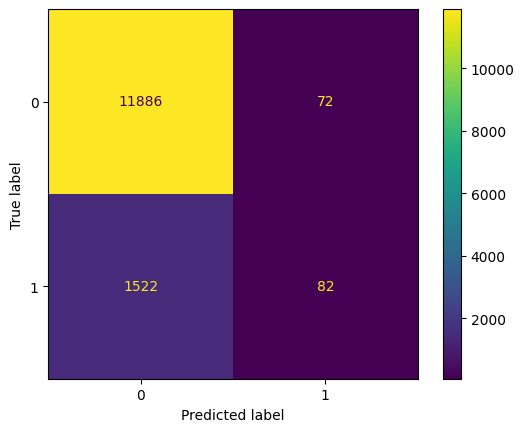

In [ ]:
img=confusion_matrix(y_test,y_pred_svm)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=model_svm.classes_)
img_plot.plot()
plt.show()

## DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=10,max_features='sqrt' )

In [ ]:
model_dtc.fit(x_train_scale,y_train)
y_pred_dtc=model_dtc.predict(x_test_scale)
print(classification_report(y_test,y_pred_dtc))
print('accuracy of DecisionTreeClassifier  is :',round(accuracy_score(y_test, y_pred_dtc)*100,2),'%')
print('aurroc-auc score of DecisionTreeClassifier is :',round(roc_auc_score(y_test,model_dtc.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11958
           1       0.54      0.41      0.47      1604

    accuracy                           0.89     13562
   macro avg       0.73      0.68      0.70     13562
weighted avg       0.88      0.89      0.88     13562

accuracy of DecisionTreeClassifier  is : 88.93 %
aurroc-auc score of DecisionTreeClassifier is : 86.0 %


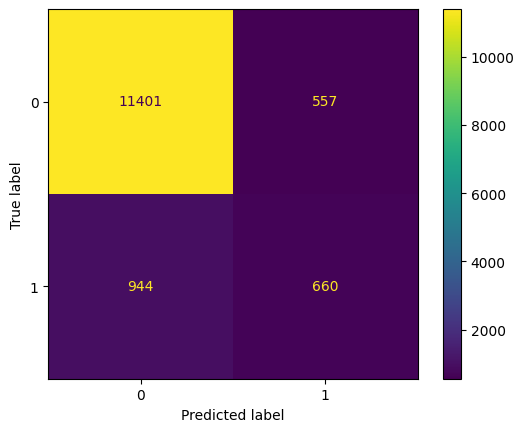

In [ ]:
img=confusion_matrix(y_test,y_pred_dtc)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=model_dtc.classes_)
img_plot.plot()
plt.show()

## GradientBoostclassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm= GradientBoostingClassifier(random_state=0, n_estimators= 100, learning_rate= 0.09, max_depth= 4)
model_gbm.fit(x_train_scale, y_train)
y_pred_gbm= model_gbm.predict(x_test_scale)


In [ ]:
print(classification_report(y_test,y_pred_gbm))
print('accuracy of GradientBoostingClassifier  is :',round(accuracy_score(y_test, y_pred_gbm)*100,2),'%')
print('aurroc-auc score of GradientBoostingClassifier is :',round(roc_auc_score(y_test,model_gbm.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11958
           1       0.64      0.41      0.50      1604

    accuracy                           0.90     13562
   macro avg       0.78      0.69      0.72     13562
weighted avg       0.89      0.90      0.89     13562

accuracy of GradientBoostingClassifier  is : 90.33 %
aurroc-auc score of GradientBoostingClassifier is : 92.0 %


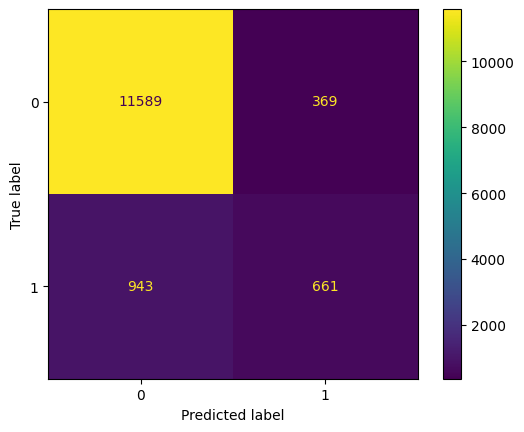

In [ ]:
img=confusion_matrix(y_test,y_pred_gbm)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=model_gbm.classes_)
img_plot.plot()
plt.show()

## XGBoostclassifier

In [ ]:
from xgboost import XGBClassifier
model_xgb= XGBClassifier(random_state=30,max_depth=9,subsample=0.2,n_estimators=300,learning_rate=0.1)
model_xgb.fit(x_train_scale, y_train)
y_pred_xgb=model_xgb.predict(x_test_scale)

In [ ]:
print(classification_report(y_test,y_pred_xgb))
print('accuracy of XGBoostClassifier  is :',round(accuracy_score(y_test, y_pred_xgb)*100,2),'%')
print('aurroc-auc score of XGBoostClassifier is :',round(roc_auc_score(y_test,model_xgb.predict_proba(x_test_scale)[:,1]),2)*100,'%')

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11958
           1       0.58      0.45      0.51      1604

    accuracy                           0.90     13562
   macro avg       0.76      0.70      0.73     13562
weighted avg       0.89      0.90      0.89     13562

accuracy of XGBoostClassifier  is : 89.71 %
aurroc-auc score of XGBoostClassifier is : 92.0 %


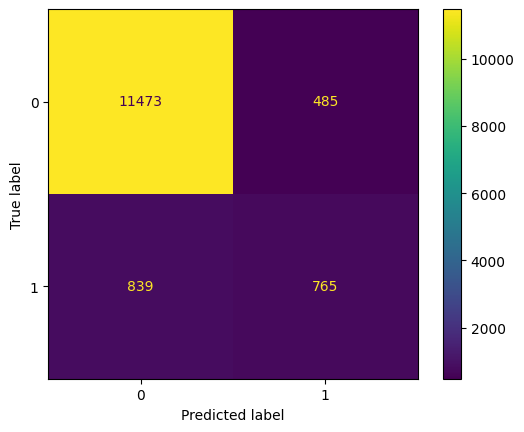

In [ ]:
img=confusion_matrix(y_test,y_pred_xgb)
img_plot=ConfusionMatrixDisplay(confusion_matrix=img,display_labels=model_xgb.classes_)
img_plot.plot()
plt.show()